<a href="https://colab.research.google.com/github/alisradenkrimakka/Project_PaperId/blob/main/PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/alisradenkrimakka/Project_PaperId.git

Cloning into 'Project_PaperId'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 10.22 KiB | 10.22 MiB/s, done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/PBL9/factpaperdigital_payment_transaction.csv')
df2 = pd.read_csv('/content/drive/MyDrive/PBL9/factpaperdigital_payment_request.csv')
df3 = pd.read_csv('/content/drive/MyDrive/PBL9/dimpaperpromotion.csv')
df4 = pd.read_csv('/content/drive/MyDrive/PBL9/dimpapercompany.csv')

In [6]:
df1.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,z_score
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,Unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,-0.185724
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,Unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,-0.185778
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,Unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,-0.176337
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,Unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,-0.185633
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,Unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,-0.176456


In [7]:
df2.head()

,dpt_id,total_fee_amount,document_type_name
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,380.0,PAY-OUT
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,273.6,PAY-OUT
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,19190.0,PAY-OUT
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,450.0,PAY-IN
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,1000.0,PAY-IN


In [8]:
df3.head()

,dpt_promotion_id,promotion_code,promotion_name,transaction_promo_cashback_amount
0,NaN,Unknown,Unknown,0.0
1,NaN,Unknown,Unknown,0.0
2,NaN,Unknown,Unknown,0.0
3,NaN,Unknown,Unknown,0.0
4,NaN,Unknown,Unknown,0.0


In [9]:
df4.head()

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58


In [10]:
filled_count = df3.notnull().sum()
empty_count = df3.isnull().sum()

# Menampilkan hasil perhitungan
print(f"Jumlah baris terisi pada kolom department_id: {filled_count}")
print(f"Jumlah baris kosong pada kolom department_id: {empty_count}")

Jumlah baris terisi pada kolom department_id: dpt_promotion_id                       937
promotion_code                       50000
promotion_name                       50000
transaction_promo_cashback_amount    50000
dtype: int64
Jumlah baris kosong pada kolom department_id: dpt_promotion_id                     49063
promotion_code                           0
promotion_name                           0
transaction_promo_cashback_amount        0
dtype: int64


In [11]:
df1['dpt_promotion_id'] = df1['dpt_promotion_id'].fillna('Unknown')

In [12]:
df3[['promotion_code', 'promotion_name']] = df3[['promotion_code', 'promotion_name']].fillna('Unknown')

In [13]:
print(df1.isnull().count())
print(df3.isnull().count())

dpt_id                          50000
dpt_promotion_id                50000
buyer_id                        50000
seller_id                       50000
transaction_amount              50000
payment_method_name             50000
payment_provider_name           50000
transaction_created_datetime    50000
transaction_updated_datetime    50000
z_score                         50000
dtype: int64
dpt_promotion_id                     50000
promotion_code                       50000
promotion_name                       50000
transaction_promo_cashback_amount    50000
dtype: int64


In [14]:
df1.to_csv('/content/drive/MyDrive/PBL9/factpaperdigital_payment_transaction.csv', index=False)


In [15]:
df3.to_csv('/content/drive/MyDrive/PBL9/dimpaperpromotion.csv', index=False)


In [16]:
column = 'transaction_amount'

# Menghitung IQR
Q1 = df1[column].quantile(0.25)
Q3 = df1[column].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter untuk outliers
outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
print("Jumlah outliers:", outliers.shape[0])


Jumlah outliers: 6777


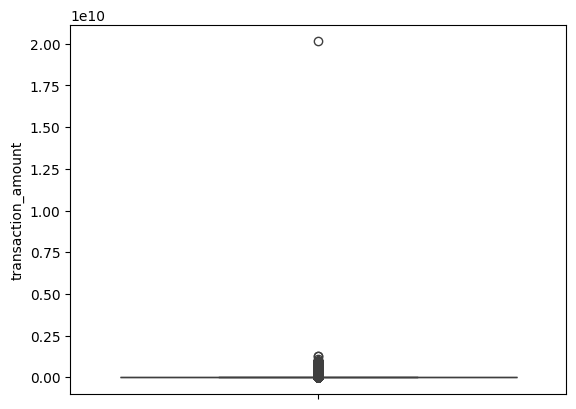

In [18]:
sns.boxplot(df1[column])
plt.show()